# 19장. 군집

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/ml-with-python-cookbook-2nd/blob/main/ch19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
import sklearn
import matplotlib

print('sklearn', sklearn.__version__)
print('matplotlib', matplotlib.__version__)

sklearn 1.6.0
matplotlib 3.8.0


## 19.1 K-평균을 사용한 군집

In [2]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data

# 특성을 표준화합니다.
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# k-평균 객체를 만듭니다.
cluster = KMeans(n_clusters=3, random_state=0, n_init="auto")

# 모델을 훈련합니다.
model = cluster.fit(features_std)

In [3]:
# 예측 클래스를 확인합니다.
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [4]:
# 진짜 클래스를 확인합니다.
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# 새로운 샘플을 만듭니다.
new_observation = [[0.8, 0.8, 0.8, 0.8]]

# 샘플의 클러스터를 예측합니다.
model.predict(new_observation)

array([2], dtype=int32)

In [6]:
model.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

### 붙임

In [7]:
model.inertia_

139.82049635974974

In [8]:
model.score(features_std)

-139.82049635974974

In [9]:
model.transform(new_observation)

array([[2.00748231, 3.45674596, 0.83965108]])

In [10]:
inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto")
    inertia.append(kmeans.fit(features_std).inertia_)

In [11]:
import matplotlib.pyplot as plt

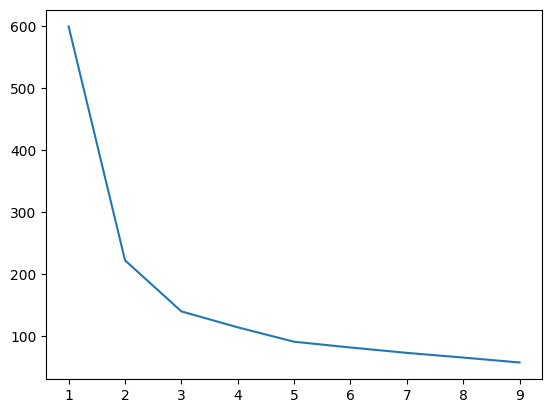

In [12]:
plt.plot(range(1, 10), inertia)
plt.show()

## 19.2 K-평균 군집 속도 향상하기

In [13]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data

# 특성을 표준화합니다.
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# k-평균 객체를 만듭니다.
cluster = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100,
                          n_init="auto")

# 모델을 훈련합니다.
model = cluster.fit(features_std)

### 붙임

In [14]:
mb_kmeans = MiniBatchKMeans(n_init="auto")

for i in range(3):
    mb_kmeans.partial_fit(features_std[i*50:(i+1)*50])

## 19.3 평균이동을 사용한 군집

In [15]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data

# 특성을 표준화합니다.
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# meanshift 객체를 만듭니다.
cluster = MeanShift(n_jobs=-1)

# 모델을 훈련합니다.
model = cluster.fit(features_std)

### 붙임

In [16]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
model.cluster_centers_

array([[ 0.50161528, -0.32287436,  0.65393539,  0.65261739],
       [-1.05954571,  0.75811468, -1.2998088 , -1.25401594]])

## 19.4 DBSCAN을 사용한 군집

In [18]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data

# 특성을 표준화합니다.
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# DBSCAN 객체를 만듭니다.
cluster = DBSCAN(n_jobs=-1)

# 모델을 훈련합니다.
model = cluster.fit(features_std)

In [19]:
# 클러스터 소속을 확인합니다.
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

### 붙임

In [20]:
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  17,
        19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,
        49,  52,  54,  55,  58,  61,  63,  64,  65,  66,  67,  69,  71,
        73,  74,  75,  77,  78,  79,  80,  81,  82,  83,  86,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  99, 101, 103, 104, 110, 111,
       112, 116, 120, 123, 126, 133, 137, 138, 139, 140, 141, 142, 143,
       145, 147])

In [21]:
cluster.fit_predict(features_std)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

## 19.5 계층적 병합을 사용한 군집

In [22]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data

# 특성을 표준화합니다.
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# 병합 군집 객체를 만듭니다.
cluster = AgglomerativeClustering(n_clusters=3)

# 모델을 훈련합니다.
model = cluster.fit(features_std)

In [23]:
# 클러스터 소속을 확인합니다.
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 붙임

In [24]:
cluster.fit_predict(features_std)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])